In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import statistics
from PIL import Image, ImageDraw
import turtle
from  random import randint
import random as rand
import matplotlib.patches as patches
import pylab as pl

## <span style="color:#CB4335"> $\triangle$ Instrucciones: </span> 
Las imágenes en blanco y negro, las representaciones gráficas de funciones y los diagramas se generan con la librería $\textbf{matplotlib}$ por lo que la salida aparece en la propia consola de Python. Sin embargo, a la hora de utilizar la librería $\textbf{PIL}$ para imágenes en color y la librería $\textbf{turtle}$ para la construcción de fractales la salida no aparece por consola. Por ello, es necesario ejecutar la celda correspondiente para que  aparezcan las figuras en una ventana emergente. No obstante, en las celdas requeridas adjuntaré las imágenes que se obtienen como resultado. 

Para facilitar esta tarea, el símbolo <span style="color:#CB4335"> $\triangle$ </span> servirá de aviso para ejecutar la celda correspondiente


## <span style="color:Teal">Índice general</span>
<p style="color:Teal">1. Sistemas dinámicos discretos </p>
<p style="color:Teal">&nbsp;&nbsp;&nbsp;&nbsp; 1.1 Sistemas dinámicos discretos no lineales </p>
<p style="color:Teal">2. Introducción a la teoría del caos: exponente de Lyapunov </p>
<p style="color:Teal">3. Sistemas dinámicos complejos </p>
<p style="color:Teal">&nbsp;&nbsp;&nbsp;&nbsp; 3.1 El conjunto de Julia </p>
<p style="color:Teal">&nbsp;&nbsp;&nbsp;&nbsp; 3.2 El conjunto de Mandelbrot </p>
<p style="color:Teal">&nbsp;&nbsp;&nbsp;&nbsp; 3.3 Aplicación de la teoría de conjuntos de Julia al método de Newton </p>
<p style="color:Teal">4. Fractales </p>
<p style="color:Teal">&nbsp;&nbsp;&nbsp;&nbsp; 4.1 Ejemplos de fractales clásicos </p>
<p style="color:Teal">&nbsp;&nbsp;&nbsp;&nbsp; 4.2 Sistema de Lindenmayer (Sistema-L) </p>
<p style="color:Teal">&nbsp;&nbsp;&nbsp;&nbsp; 4.3 Sistema de funciones iteradas (SFI) </p>
<p style="color:Teal">5. Dimensión fractal </p>
<p style="color:Teal">&nbsp;&nbsp;&nbsp;&nbsp; 5.1 Dimensión box counting </p>

## 1. Sistemas dinámicos discretos
### 1.1 Sistemas dinámicos discretos no lineales
En este capítulo, se introducirán distintos ejemplos de sistemas dinámicos discretos no lineales. El siguiente código aporta una visión gráfica de estos sistemas. De esta manera, resulta más fácil calcular puntos fijos, puntos periódicos, órbitas y analizar comportamientos de atracción y repulsión. Los mapas que se presentarán son los siguientes:
- Mapa tienda
- Mapa logístico y diagrama de bifurcación
- Mapa de Gauss
- Mapa de Hénon


### Mapa tienda

Sea $T \colon [0,1] \to [0,1]$ continua.El mapa tienda viene dado por:
  
<center>
$T(x)=\left \{ \begin{matrix} \mu x & \mbox{si } 0 \leq x < \frac{1}{2}
\\ \mu(1-x) & \mbox{si }\frac{1}{2} \leq x \leq 1 \end{matrix}\right. \hspace{0.5cm} 0 \leq \mu \leq 2 $
</center>

In [3]:
def T(mu,x): 
    """
    Definición de la función tienda T(X).
    
    Parámetros
    ----------
    mu : Parámetro mu de la función tienda mu \in [0,2].  
    x : Parámetro x de la función tienda x \in [0,1] .
        
    Returns
    -------
    Valor de la función tienda. 
    """
    
    if x>=0 and x<=1/2:
        return mu*x
    elif x>=1/2 and x<=1: 
        return mu*(1-x)
    
def plotT(mu):
    """
    Representación del mapa tienda
    
    Parámetros
    ----------
    mu : Parámetro mu de la función tienda mu \in [0,2]. 
    """
    
    ejex1=np.linspace(0,1/2, 100)
    ejex2=np.linspace(1/2,1, 100)
    plt.plot(ejex1, mu*ejex1,'k-')
    plt.plot(ejex2, mu*(1-ejex2),'k-')
    plt.xlabel('x')
    plt.ylabel('T(x)')

Representación del mapa tienda cuando $\mu=\frac{3}{2}$.

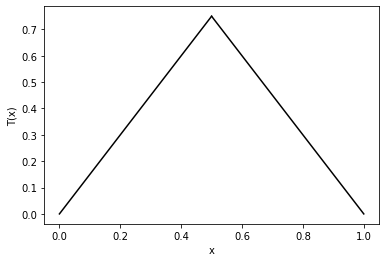

In [4]:
plotT(3/2)

Método para encontrar los puntos fijos de $T(x)$: intersección del mapa tienda  con la diagonal $y=x$.

In [5]:
def plotIntersectionT(mu):
    """
    Intersección del mapa tienda con la diagonal y=x
    
    Parámetros
    ----------
    mu : Parámetro mu de la función tienda mu \in [0,2]. 
    """ 
    plotT(mu)
    ejex=np.linspace(0,1, 20)
    plt.plot(ejex, ejex,'r-')
    plt.show()    

Puntos fijos cuando:
- $ 0 \leq \mu <1$
- $ \mu = 1$
- $ 1 < \mu \geq 2$

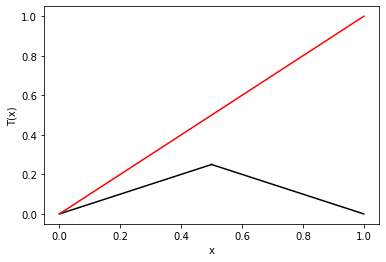

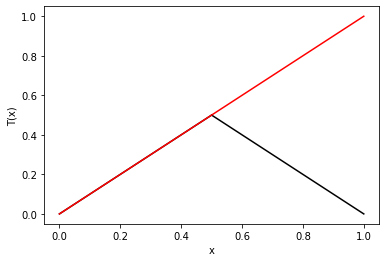

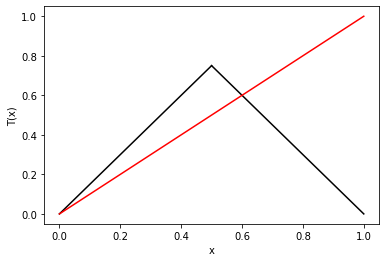

In [6]:
plotIntersectionT(1/2)
plotIntersectionT(1)
plotIntersectionT(3/2)

Cálculo de la órbita $O^+(x_0)$. 

In [7]:
def tentMap(mu,x0,n):
    """
    Cálculo y representación gráfica de la órbita de un punto del mapa tienda
    
    Parámetros
    ----------
    mu : Parámetro mu de la función tienda mu \in [0,2]. 
    x0 : Valor inicial x0 \in [0,1].
    n : Número de iteraciones
    """ 
    
    #Arrays para almacenar los puntos para representar la órbita
    inputs = np.array([])
    outputs = np.array([])
    
    #Primer punto (x0,0)
    inputs = np.append(inputs, x0)
    outputs = np.append(outputs, 0)
    
    print("X0:  ",x0)
    x=x0
    
    #Obtención de los puntos, como resultado de las iteraciones de T
    for i in range(1,n):
        inputs = np.append(inputs, x)
        inputs = np.append(inputs, x)
        outputs = np.append(outputs, x)
        x=T(mu,x)
        print("Iteración ", i ," :" ,x)
        outputs = np.append(outputs, x)
    
    #Obtenemos como resultados dos conjuntos de puntos:
    #    inputs  = { x0, x0,   x0,  T(x0), T(x0), ...}
    #    outputs = { 0,  x0, T(x0), T(x0), T^2(x0), ...}
        
        
    #Representamos los puntos en el plano (azul)
    plt.plot(inputs,outputs,'b-')
    
    #Gráfica de la función tienda y la recta y=x
    plotIntersectionT(mu)

Iteraciones del mapa tienda cuando $\mu=2$ y $x_0=\frac{1}{5}$.

X0:   0.2
Iteración  1  : 0.4
Iteración  2  : 0.8
Iteración  3  : 0.3999999999999999
Iteración  4  : 0.7999999999999998
Iteración  5  : 0.40000000000000036
Iteración  6  : 0.8000000000000007
Iteración  7  : 0.3999999999999986
Iteración  8  : 0.7999999999999972
Iteración  9  : 0.4000000000000057
Iteración  10  : 0.8000000000000114
Iteración  11  : 0.39999999999997726
Iteración  12  : 0.7999999999999545
Iteración  13  : 0.40000000000009095
Iteración  14  : 0.8000000000001819
Iteración  15  : 0.3999999999996362
Iteración  16  : 0.7999999999992724
Iteración  17  : 0.4000000000014552
Iteración  18  : 0.8000000000029104
Iteración  19  : 0.39999999999417923


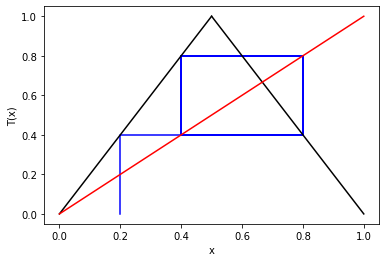

In [8]:
tentMap(2, 0.2, 20)

Iteraciones del mapa tienda cuando $\mu=\frac{3}{2}$ y $x_0=\frac{1}{3}$.

X0:   0.3333333333333333
Iteración  1  : 0.5
Iteración  2  : 0.75
Iteración  3  : 0.375
Iteración  4  : 0.5625
Iteración  5  : 0.65625
Iteración  6  : 0.515625
Iteración  7  : 0.7265625
Iteración  8  : 0.41015625
Iteración  9  : 0.615234375
Iteración  10  : 0.5771484375
Iteración  11  : 0.63427734375
Iteración  12  : 0.548583984375
Iteración  13  : 0.6771240234375
Iteración  14  : 0.48431396484375
Iteración  15  : 0.726470947265625
Iteración  16  : 0.4102935791015625
Iteración  17  : 0.6154403686523438
Iteración  18  : 0.5768394470214844
Iteración  19  : 0.6347408294677734
Iteración  20  : 0.5478887557983398
Iteración  21  : 0.6781668663024902
Iteración  22  : 0.48274970054626465
Iteración  23  : 0.724124550819397
Iteración  24  : 0.41381317377090454
Iteración  25  : 0.6207197606563568
Iteración  26  : 0.5689203590154648
Iteración  27  : 0.6466194614768028
Iteración  28  : 0.5300708077847958
Iteración  29  : 0.7048937883228064
Iteración  30  : 0.44265931751579046
Iteración  31  : 0.663

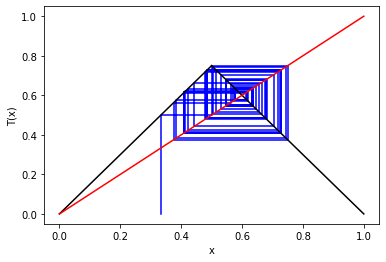

In [9]:
tentMap(3/2, 1/3, 50)

Definición y representación de la segunda iterada $T^2(x)$. Método para encontrar los puntos periódicos de periodo dos del sistema.


In [10]:
def T2(mu,x):
    """
    Definición de la segunda iterada de la función tienda T^2(X).
    
    Parámetros
    ----------
    mu : Parámetro mu de la función tienda mu \in [0,2].
    x : Parámetro x de la función tienda x \in [0,1] 
        
    Returns
    -------
    Valor de la segunda iterada de la función tienda. 
    """
    
    if x>=0 and x<=1/(2*mu):
        return mu*mu*x
    elif x>1/(2*mu) and x<=1/2: 
        return mu*(1-mu*x)
    elif x> 1/2 and x<=1-1/(2*mu): 
        return mu*(1-mu*(1-x))
    elif x>1-1/(2*mu) and x<=1: 
        return mu*mu*(1-x)
    
def plotIntersectionT2(mu):
    """
    Intersección de la segunda iterada del mapa tienda con la diagonal y=x
    
    Parámetros
    ----------
    mu : Parámetro mu de la función tienda mu \in [0,2]. 
    """ 
    
    ejex=np.linspace(0,1, 4)
    plt.plot(ejex, ejex,'r-')
    
    ejex1=np.linspace(0,1/(2*mu), 10)
    ejex2=np.linspace(1/(2*mu),1/2, 10)
    ejex3=np.linspace(1/2, 1-1/(2*mu), 10)
    ejex4=np.linspace(1-1/(2*mu),1, 10)
    
    plt.plot(ejex1,mu*mu*ejex1 ,'k-')
    plt.plot(ejex2,mu*(1-mu*ejex2) ,'k-')
    plt.plot(ejex3,mu*(1-mu*(1-ejex3)) ,'k-')
    plt.plot(ejex4,mu*mu*(1-ejex4),'k-')
    
    plt.xlabel('x')
    plt.ylabel('T^2(x)')
    plt.show()

Intersección de la diagonal $y=x$ con la segunda iterada del mapa tienda cuando $\mu=2$ (puntos de periodo dos).

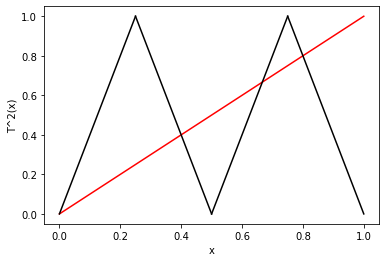

In [11]:
plotIntersectionT2(2)

### Mapa logístico y diagrama de bifurcación 

Sea $f_\mu \colon [0,1] \to [0,1]$ continua. El mapa logístico viene dado por:
<center>
$f_\mu(x)=\mu x(1-x)$ $\hspace{0.5cm}$ $ \mu \in [0,4]$ 
</center>

In [12]:
def logistic(mu,x):
    """
    Definición de la función logśitica.
    
    Parámetros
    ----------
    mu : Parámetro mu de la función logística mu  \in [0,4].  
    x : Parámetro x de la función logística x \in [0,1] .
        
    Returns
    -------
    Valor de la función logística. 
    """
    return mu*x*(1.0-x)

def plotLogistic(mu):
    """
    Representación de la función logística
    
    Parámetros
    ----------
    mu : Parámetro mu de la función logística mu  \in [0,4].  
    """
    
    ejex=np.linspace(0,1, 50)
    plt.plot(ejex, mu*ejex*(1.0-ejex),'k-')
    plt.xlabel('x')
    plt.ylabel('f(x) logística')
    plt.show()

Representación del mapa logístico cuando $\mu=\frac{3}{2}$. Observamos como el máximo se alcanza en $\frac{\mu}{4}$.

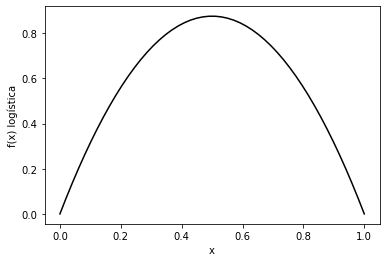

In [13]:
plotLogistic(3.5)

Cálculo de las iteraciones del mapa logístico: $f^n_\mu(x)$.

In [14]:
def plotLogisticIterations(mu,x0,n):
    """
    Cálculo de las iteraciones de la función logística a partir de un valor inicial
    
    Parámetros
    ----------
    mu : Parámetro mu de la función logística mu \in [0,4]. 
    x0 : Valor inicial x0 \in [0,1].
    n : Número de iteraciones
    """ 
    #Cada posición del array ejex contiene la iteración 'i' y el ejey contiene su correspondiente valor f^i(x0)
    ejex = np.array([])
    ejey = np.array([])
    
    for i in range(1,n):
        x=x0
        for j in range(i):
            x=logistic(mu,x)
        ejex = np.append(ejex, i)
        ejey =np.append(ejey,x)

    plt.plot(ejex, ejey,'k-')
        
    plt.xlabel('n')
    plt.ylabel('f^n(x)')
    plt.show()

Iteraciones del mapa logístico $f^n_\mu(x)$ cuando $x_0=\frac{1}{2}$ y $\mu$ cumple:
- $ 0 \leq \mu \leq 1$
- $ 1 < \mu \leq 3$
- $ 3 < \mu \leq 1+\sqrt{6}$
- $ 1+\sqrt{6} < \mu \leq 3.57 $ (punto de entrada al caos)
- $ 3.57 < \mu \leq 1 +\sqrt{8}$
- $ \mu >  1 +\sqrt{8}$

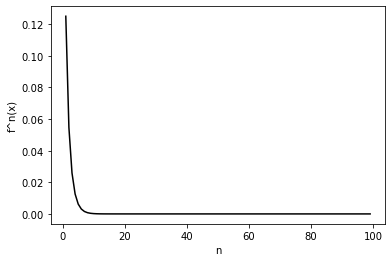

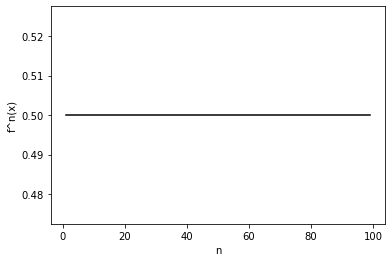

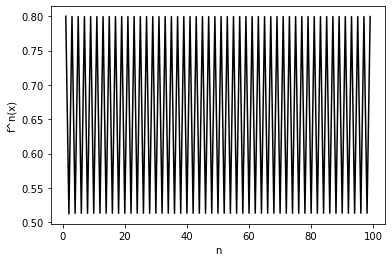

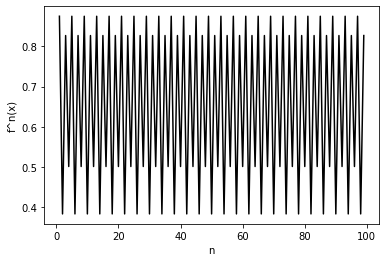

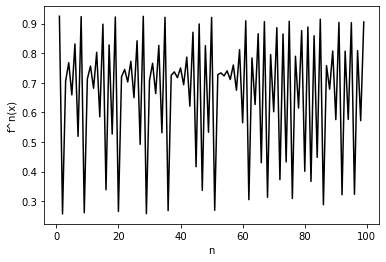

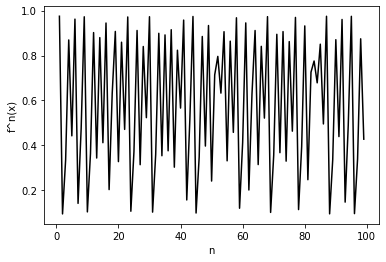

In [15]:
plotLogisticIterations(1/2,1/2,100)
plotLogisticIterations(2,1/2,100)
plotLogisticIterations(3.2,1/2,100)
plotLogisticIterations(3.50,1/2,100)
plotLogisticIterations(3.7,1/2,100)
plotLogisticIterations(3.9,1/2,100)

Diagrama de bifurcación o Feigenbaum para $ \mu \in[a,b] \subseteq [0,4]$ .

In [16]:
def bifDiagramLogistic(a,b,x0):
    """
    Diagrama de bifurcación del mapa logístico
    
    Parámetros
    ----------
    a: extremo inferior del intervalo [a,b] \subset [0,4]
    b: extremo superior del intervalo [a,b] \subset [0,4]
    x0 : Valor inicial x0 \in [0,1].
    """ 
    
    #Particionamos el intervalo [a,b] donde se mueve el valor de mu
    mu=np.arange(a,b,0.0001)
    
    #Para una mayor precisión, solo dibujamos las últimas 100 iteraciones
    #Número de iteraciones sin salida
    iteraciones=1500
    #Número de iteraciones para dibujar
    ultimas=100
    
    for i in range(iteraciones+ultimas):
        x0=logistic(mu,x0)
        if i>=iteraciones:
            plt.plot(mu,x0,color='black',markersize=0.1)
          
    plt.xlabel('\N{GREEK SMALL LETTER MU}')
    plt.ylabel('Xn')
    plt.show()

Diagrama de bifurcación o Feigenbaum para $x_0=\frac{1}{2}$

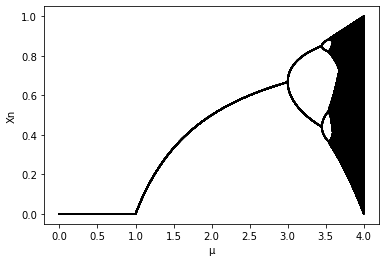

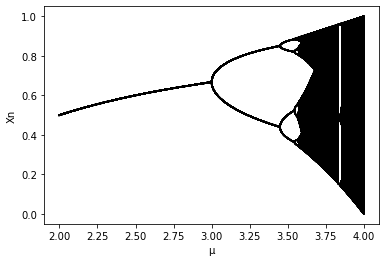

In [17]:
bifDiagramLogistic(0, 4, 1/2)
bifDiagramLogistic(2, 4, 1/2)

### Mapa de Gauss

Sea $G \colon \mathbb{R} \to \mathbb{R}$ continua. El mapa de Gauss de Gauss viene dado por:
<center>
$G(x)=e^{-\alpha x^2}+\beta$ $\hspace{0.5cm} $ $\alpha, \beta$ constantes
</center>

In [18]:
def gauss(alfa,beta,x):
    """
    Definición de la función de Gauss.
    
    Parámetros
    ----------
    alfa : Parámetro alfa de la función de Gauss, alfa es una constante real.
    beta : Parámetro beta de la función de Gauss, beta es una constante real.
    x : Parámetro x de la función de Gauss x \in R .
        
    Returns
    -------
    Valor de la función de Gauss. 
    """
    return math.exp(-alfa*x*x)+beta

def plotGauss(alfa,beta):
    """
    Representación de la función de Gauss.
    
    Parámetros
    ----------
    alfa : Parámetro alfa de la función de Gauss, alfa es una constante real.
    beta : Parámetro beta de la función de Gauss, beta es una constante real.
    """

    ejex = np.array([])
    ejey = np.array([])
    ejex=np.linspace(-2,2, 50)
    for i in range (50):
        x=gauss(alfa, beta, ejex[i])
        ejey =np.append(ejey,x)

    plt.plot(ejex, ejey ,'k-')
    plt.xlabel('x')
    plt.ylabel('G(x) Gauss')
    plt.show()

Representación del mapa de Gauss para:
- $\alpha=1$ y $\beta=4$
- $\alpha=4$ y $\beta=1$

El parámetro $\beta$ traslada la función de Gauss en el eje de ordenadas. El parámetro $\alpha$ tiene relación con la anchura de la curva. 

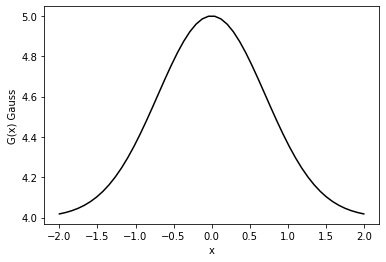

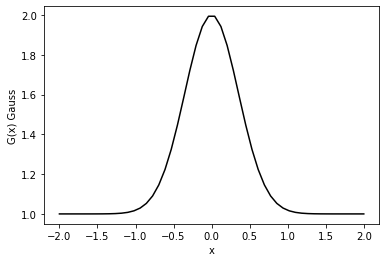

In [19]:
plotGauss(1,4)
plotGauss(4,1)

Método para encontrar los puntos fijos de $G(x)$: intersección con la diagonal $y=x$.

In [20]:
def plotIntersectionGauss(alfa,beta):
    """
    Representación de la intersección del mapa de Gauss con la diagonal.
    
    Parámetros
    ----------
    alfa : Parámetro alfa de la función de Gauss, alfa es una constante real.
    beta : Parámetro beta de la función de Gauss, beta es una constante real.
    """

    ejex=np.linspace(-2,2, 20)
    plt.plot(ejex, ejex,'r-')
    plotGauss(alfa,beta)

El mapa $G(x)$ se interseca con la diagonal en uno, dos o tres puntos.

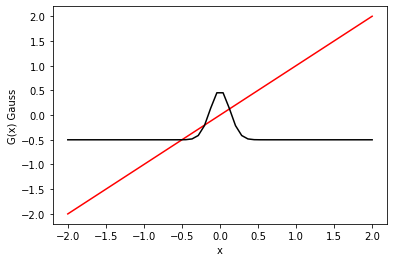

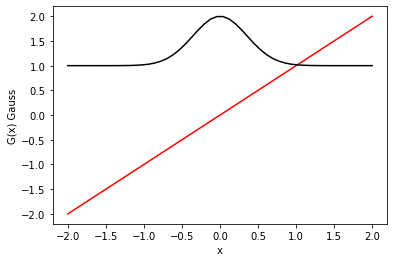

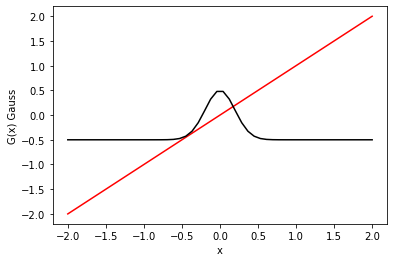

In [21]:
plotIntersectionGauss(30,-1/2)
plotIntersectionGauss(4,1)
plotIntersectionGauss(13,-1/2)

Diagrama de bifurcación o Feigenbaum en el intervalo $[a,b]$

In [22]:
def bifDiagramGaussMap(a,b,alfa,x0):
    """
    Diagrama de bifurcación del mapa de Gauss
    
    Parámetros
    ----------
    a: extremo inferior del intervalo [a,b] 
    b: extremo superior del intervalo [a,b] 
    alfa : Parámetro alfa de la función de Gauss, alfa es una constante real.
    x0 : Valor inicial x0 \in [0,1].
    """ 
    #Particionamos el intervalo [a,b] donde se mueve el valor de beta
    beta=np.linspace(a,b,500)
    #Número de iteraciones 
    iteraciones=50
   
    for i in beta:
        for j in range(iteraciones):
            x0=gauss(alfa,i,x0)
            plt.plot(i,x0,'^',color='black',markersize=0.1)
       
                
    plt.xlabel('\N{GREEK SMALL LETTER BETA}')
    plt.ylabel('Xn')
    plt.show()

Diagrama de bifurcación o Feigenbaum del mapa de Gauss para $x_0=0$ cuando:
- $\alpha=8$
- $\alpha=4$

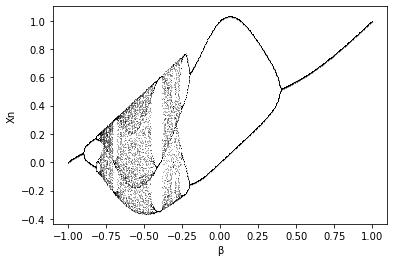

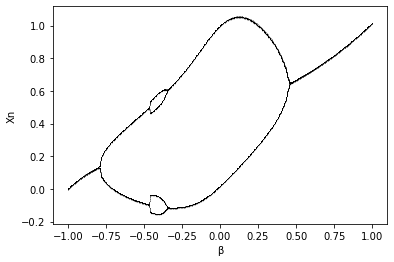

In [23]:
bifDiagramGaussMap(-1, 1, 8, 0)
bifDiagramGaussMap(-1, 1, 4, 0)

### Mapa de Hénon

Definición y representación del mapa de Hénon, $P \colon \mathbb{R} \to \mathbb{R}$ y $Q \colon \mathbb{R} \to \mathbb{R}$:
<center>
$P(x,y)=1-y+\alpha x^2$  
</center>
<center>
$Q(x,y)=\beta x$
</center>
a partir de un valor inicial $(x_0,y_0)$.

In [24]:
def henon(alfa,beta,x,y):
    """
    Definición de la función de Hénon.
    
    Parámetros
    ----------
    alfa : Parámetro alfa de la función de Hénon, alfa > 0.
    beta : Parámetro beta de la función de Hénon, |beta|<1.
    x: coordenada x del punto (x,y) del mapa de Hénon.
    y: coordenada y del puntos (x,y) del mapa de Hénon.
        
    Returns
    -------
    Valor de la función de Hénon. 
    """
    
    return 1+y-alfa*x*x, beta*x

def henonMap(alfa,beta,x0,y0,n):
    """
    Cálculo de la órbita de un punto del mapa de Hénon. 
    
    Parámetros
    ----------
    alfa : Parámetro alfa de la función de Hénon, alfa > 0.
    beta : Parámetro beta de la función de Hénon, |beta|<1.
    x0: coordenada x del valor inicial (x0,y0) del mapa de Hénon.
    y0: coordenada y del valor inicial (x0,y0) del mapa de Hénon.
    n: número de iteraciones
    """ 
    #Arrays para guardar los puntos que pertenecen al mapa
    x= np.array([])
    y= np.array([])
    #Valor inicial (x0,y0)
    x= np.append(x, x0)
    y= np.append(y, y0)
    print("X0,Y0 : (" ,x0," , " ,y0, " )")
    
    #Iteraciones del mapa
    for i in range (1,n):
        x0, y0 =henon(alfa,beta,x0,y0)
        x= np.append(x, x0)
        y= np.append(y ,y0)
        print("Iteración ", i ," : (" ,x0," , " ,y0, " )")
        
 
     #La opcion '^' es para pintar SOLO los puntos
    plt.plot(x,y,'^', color='black',markersize=0.7 )
    plt.show()

Mapa de Hénon para $\alpha=1.2$, $\beta=0.4$ y valor inicial $(0.1,0)$

X0,Y0 : ( 0.1  ,  0  )
Iteración  1  : ( 0.988  ,  0.04000000000000001  )
Iteración  2  : ( -0.13137279999999985  ,  0.3952  )
Iteración  3  : ( 1.3744894249041921  ,  -0.05254911999999994  )
Iteración  4  : ( -1.3196145350081478  ,  0.5497957699616769  )
Iteración  5  : ( -0.5398632552440474  ,  -0.5278458140032591  )
Iteración  6  : ( 0.12241138476150143  ,  -0.21594530209761897  )
Iteración  7  : ( 0.766073241359307  ,  0.048964553904600576  )
Iteración  8  : ( 0.34472270055249465  ,  0.3064292965437228  )
Iteración  9  : ( 1.163828808212277  ,  0.13788908022099786  )
Iteración  10  : ( -0.487507913568773  ,  0.4655315232849108  )
Iteración  11  : ( 1.180334764334297  ,  -0.1950031654275092  )
Iteración  12  : ( -0.8668313525028294  ,  0.47213390573371883  )
Iteración  13  : ( 0.5704579933154575  ,  -0.34673254100113177  )
Iteración  14  : ( 0.26276067243386997  ,  0.22818319732618303  )
Iteración  15  : ( 1.1453313921527035  ,  0.10510426897354799  )
Iteración  16  : ( -0.469036528

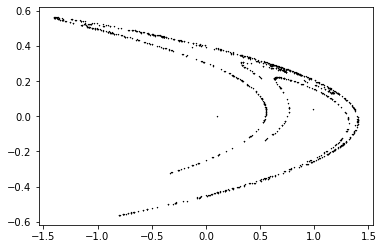

In [26]:
henonMap(1.2, 0.4, 0.1, 0, 1000)

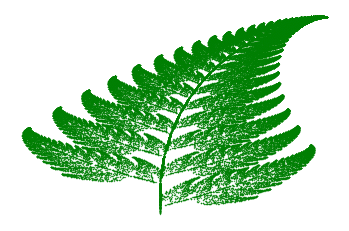

In [ ]:
<p align="left">
  <img src="https://github.com/waldyr/Sublime-Installer/blob/master/sublime_text.png?raw=true" alt="Sublime's custom image"/>
</p>